### **Required Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

### **ML Library**

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Durgeshsingh12712/Data-All/refs/heads/main/Unified%20Dataset/CloudWatch_Traffic_Web_Attack.csv")
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [5]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [6]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [7]:
print("\nUnique values in categorical columns:")
categorical_cols = ['src_ip_country_code', 'protocol', 'rule_names', 'observation_name', 
                   'source.meta', 'source.name', 'detection_types']

for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
        print(f"Values: {df[col].unique()[:10]}")
        print()


Unique values in categorical columns:
src_ip_country_code: 7 unique values
Values: ['AE' 'US' 'CA' 'NL' 'DE' 'AT' 'IL']

protocol: 1 unique values
Values: ['HTTPS']

rule_names: 1 unique values
Values: ['Suspicious Web Traffic']

observation_name: 1 unique values
Values: ['Adversary Infrastructure Interaction']

source.meta: 1 unique values
Values: ['AWS_VPC_Flow']

source.name: 1 unique values
Values: ['prod_webserver']

detection_types: 1 unique values
Values: ['waf_rule']



### **DATA CLEANING AND PREPROCESSING**

In [8]:
df.shape

(282, 16)

In [9]:
df_unique = df.drop_duplicates()

In [10]:
print(f"After removing duplicates: {df_unique.shape}")

After removing duplicates: (282, 16)


In [11]:
time_columns = ['creation_time', 'end_time', 'time']
for col in time_columns:
    if col in df_unique.columns:
        df_unique[col] = pd.to_datetime(df_unique[col])
        print(f"Converted {col} to datetime")

Converted creation_time to datetime
Converted end_time to datetime
Converted time to datetime


In [12]:
if 'src_ip_country_code' in df_unique.columns:
    df_unique['src_ip_country_code'] = df_unique['src_ip_country_code'].str.upper()
    print("Standardized country codes to uppercase")

Standardized country codes to uppercase


In [13]:
print("\nCleaned dataset info:")
print(df_unique.info())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object             
 12 

### **FEATURE ENGINEERING**

In [14]:
# Calculate connection duration
if 'creation_time' in df_unique.columns and 'end_time' in df_unique.columns:
    df_unique['duration_seconds'] = (df_unique['end_time'] - df_unique['creation_time']).dt.total_seconds()
    print("Created duration_seconds feature")

Created duration_seconds feature


In [15]:
# Create traffic ratio feature
if 'bytes_in' in df_unique.columns and 'bytes_out' in df_unique.columns:
    df_unique['traffic_ratio'] = df_unique['bytes_out'] / (df_unique['bytes_in'] + 1)  # Add 1 to avoid division by zero
    print("Created traffic_ratio feature")

Created traffic_ratio feature


In [16]:
# Create total traffic feature
df_unique['total_traffic'] = df_unique['bytes_in'] + df_unique['bytes_out']
print("Created total_traffic feature")

Created total_traffic feature


In [17]:
print(f"New features added. Dataset shape: {df_unique.shape}")

New features added. Dataset shape: (282, 19)


### **DATA TRANSFORMATION**

In [18]:
# Prepare numerical features for scaling
numerical_features = ['bytes_in', 'bytes_out', 'duration_seconds', 'traffic_ratio', 'total_traffic']
numerical_features = [col for col in numerical_features if col in df_unique.columns]

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[numerical_features])

In [20]:
# Create scaled feature names
scaled_columns = [f'scaled_{col}' for col in numerical_features]

In [21]:
# OneHotEncoder for categorical features
if 'src_ip_country_code' in df_unique.columns:
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
    encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])
    encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])
    print(f"One-hot encoded country codes: {len(encoded_columns)} features")
else:
    encoded_features = np.array([]).reshape(len(df_unique), 0)
    encoded_columns = []

One-hot encoded country codes: 6 features


In [22]:
# Convert to DataFrames
scaled_df = pd.DataFrame(scaled_features, columns=scaled_columns, index=df_unique.index)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df_unique.index)

In [23]:
transformed_df = pd.concat([df_unique, scaled_df, encoded_df], axis=1)

print(f"Transformed dataset shape: {transformed_df.shape}")

Transformed dataset shape: (282, 30)


### **EXPLORATORY DATA ANALYSIS (EDA)**

In [24]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

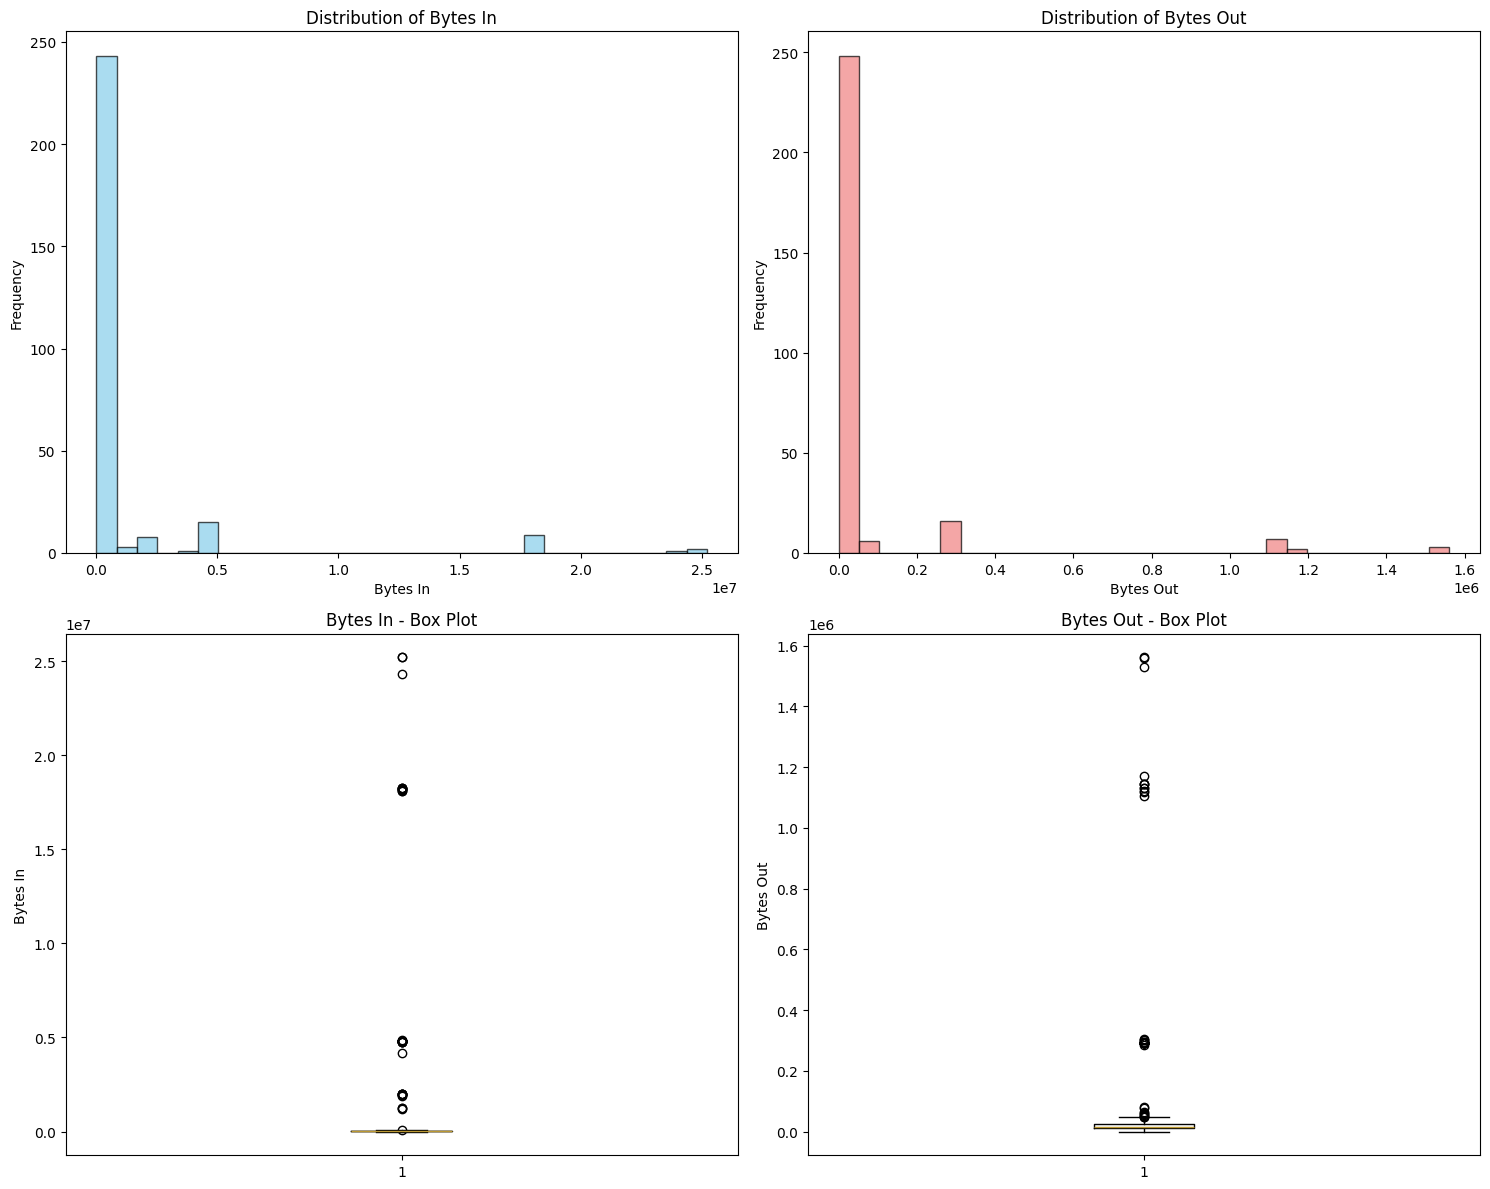

In [30]:
# 1. Distribution of bytes_in and bytes_out

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograms
axes[0, 0].hist(transformed_df['bytes_in'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Bytes In')
axes[0, 0].set_xlabel('Bytes In')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(transformed_df['bytes_out'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Bytes Out')
axes[0, 1].set_xlabel('Bytes Out')
axes[0, 1].set_ylabel('Frequency')

# Box plots
axes[1, 0].boxplot(transformed_df['bytes_in'])
axes[1, 0].set_title('Bytes In - Box Plot')
axes[1, 0].set_ylabel('Bytes In')

axes[1, 1].boxplot(transformed_df['bytes_out'])
axes[1, 1].set_title('Bytes Out - Box Plot')
axes[1, 1].set_ylabel('Bytes Out')

plt.tight_layout()
plt.show()

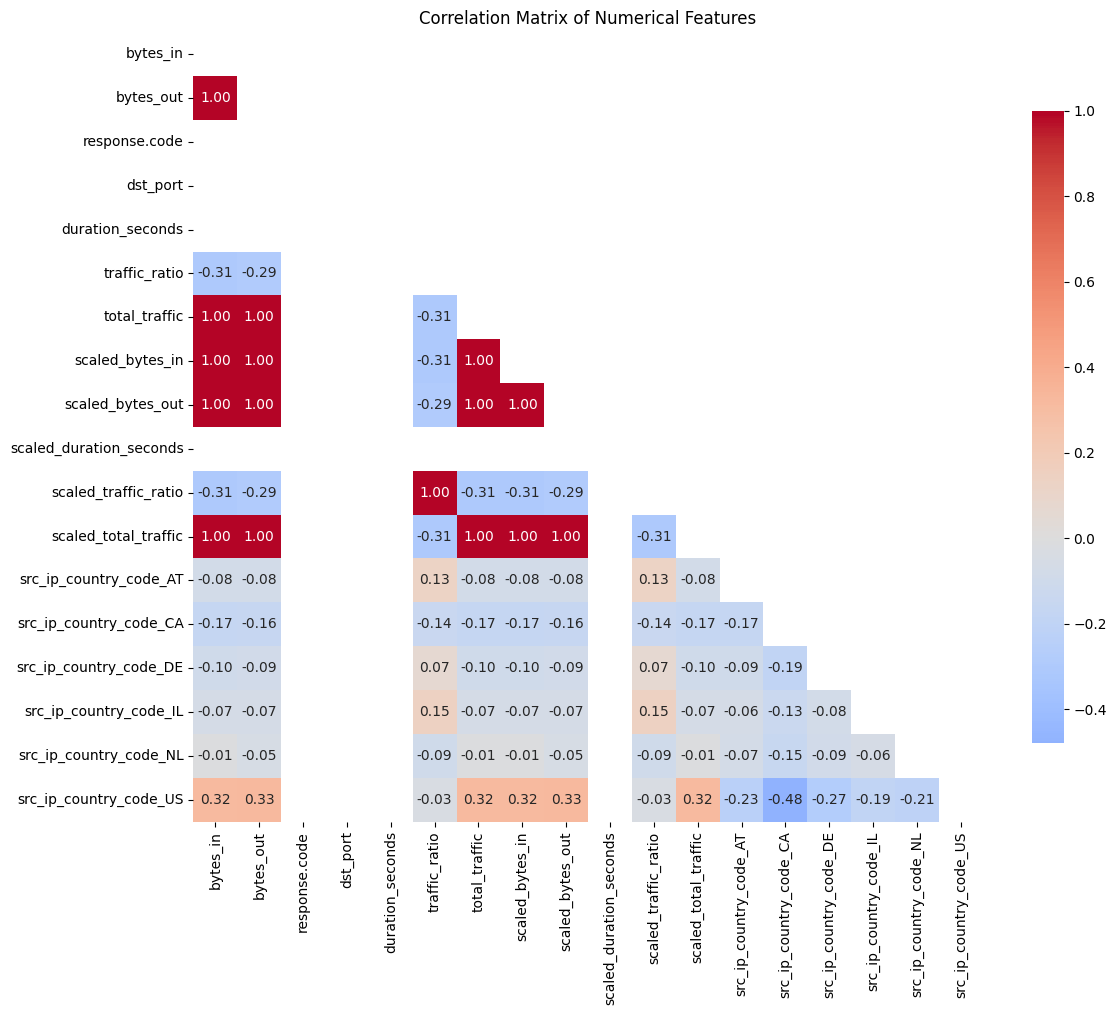

In [29]:
# 2. Correlation analysis for numerical features

numerical_cols = transformed_df.select_dtypes(include=[np.number]).columns
correlation_matrix = transformed_df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

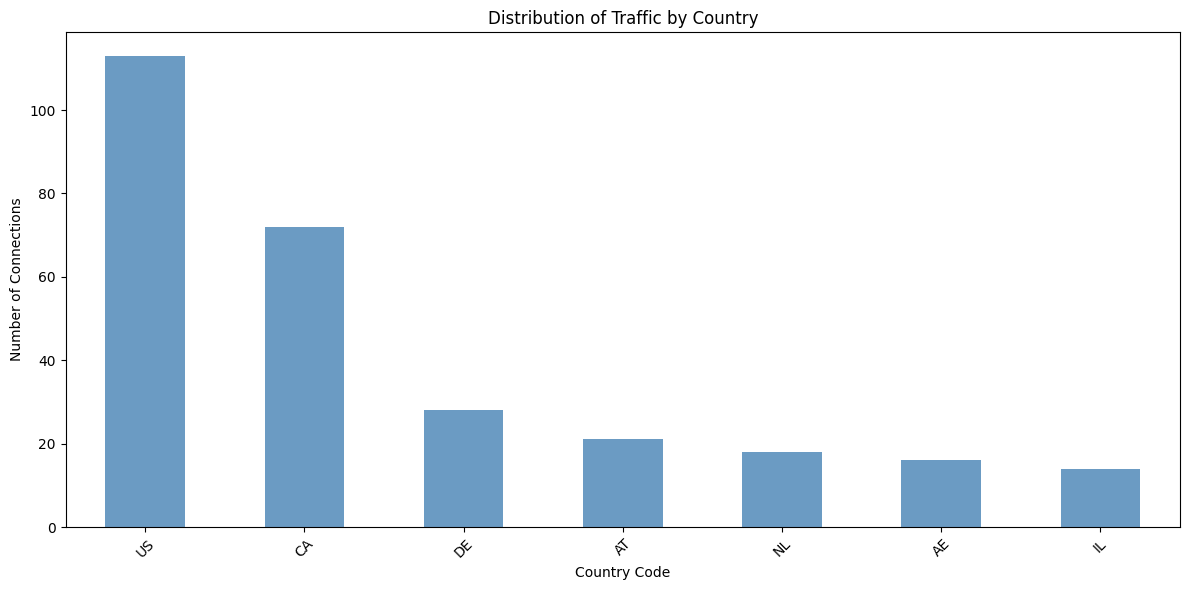

In [28]:
# 3. Country-wise analysis
if 'src_ip_country_code' in transformed_df.columns:
    plt.figure(figsize=(12, 6))
    country_counts = transformed_df['src_ip_country_code'].value_counts()
    country_counts.plot(kind='bar', color='steelblue', alpha=0.8)
    plt.title('Distribution of Traffic by Country')
    plt.xlabel('Country Code')
    plt.ylabel('Number of Connections')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

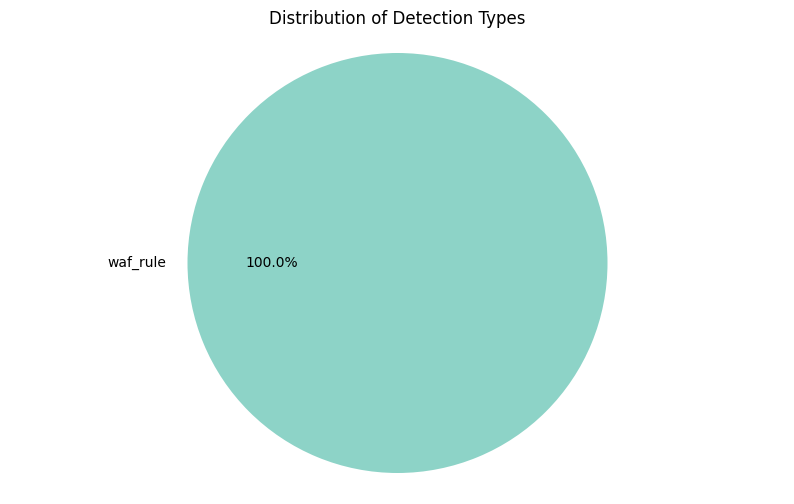

In [31]:
# 4. Detection types analysis
if 'detection_types' in transformed_df.columns:
    plt.figure(figsize=(10, 6))
    detection_counts = transformed_df['detection_types'].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(detection_counts)))
    plt.pie(detection_counts.values, labels=detection_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title('Distribution of Detection Types')
    plt.axis('equal')
    plt.show()

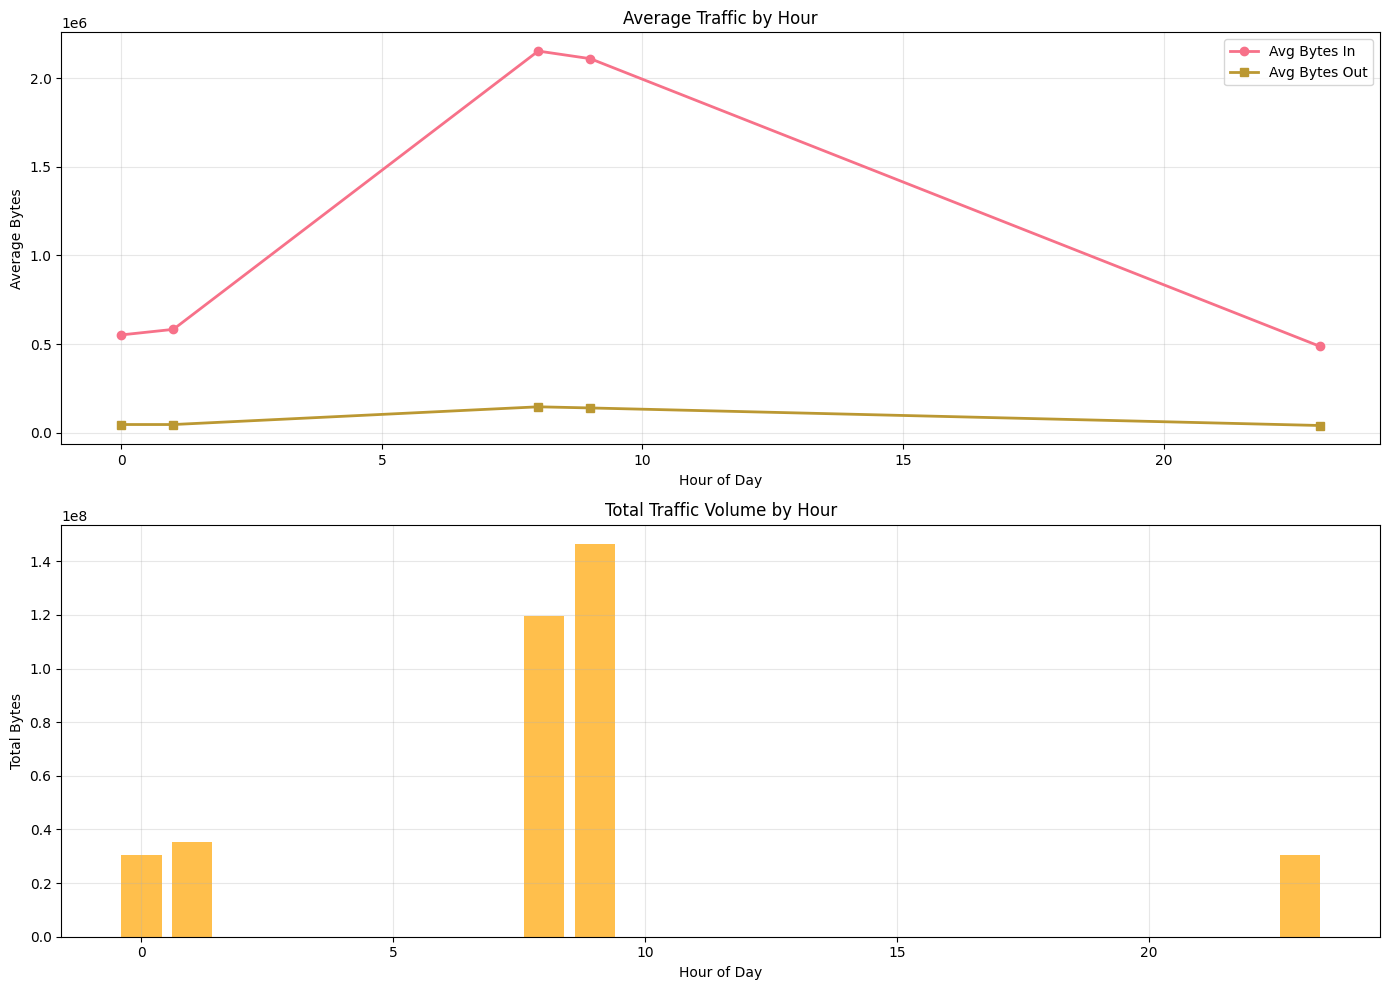

In [32]:
# 5. Traffic analysis over time
if 'time' in transformed_df.columns:
    # Convert time to datetime if not already
    transformed_df['time'] = pd.to_datetime(transformed_df['time'])
    
    # Group by hour
    hourly_stats = transformed_df.groupby(transformed_df['time'].dt.hour).agg({
        'bytes_in': ['mean', 'sum'],
        'bytes_out': ['mean', 'sum'],
        'total_traffic': 'sum'
    }).round(2)
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Average traffic by hour
    hours = hourly_stats.index
    axes[0].plot(hours, hourly_stats[('bytes_in', 'mean')], marker='o', label='Avg Bytes In', linewidth=2)
    axes[0].plot(hours, hourly_stats[('bytes_out', 'mean')], marker='s', label='Avg Bytes Out', linewidth=2)
    axes[0].set_title('Average Traffic by Hour')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Average Bytes')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Total traffic by hour
    axes[1].bar(hours, hourly_stats[('total_traffic', 'sum')], alpha=0.7, color='orange')
    axes[1].set_title('Total Traffic Volume by Hour')
    axes[1].set_xlabel('Hour of Day')
    axes[1].set_ylabel('Total Bytes')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Creating network visualization...


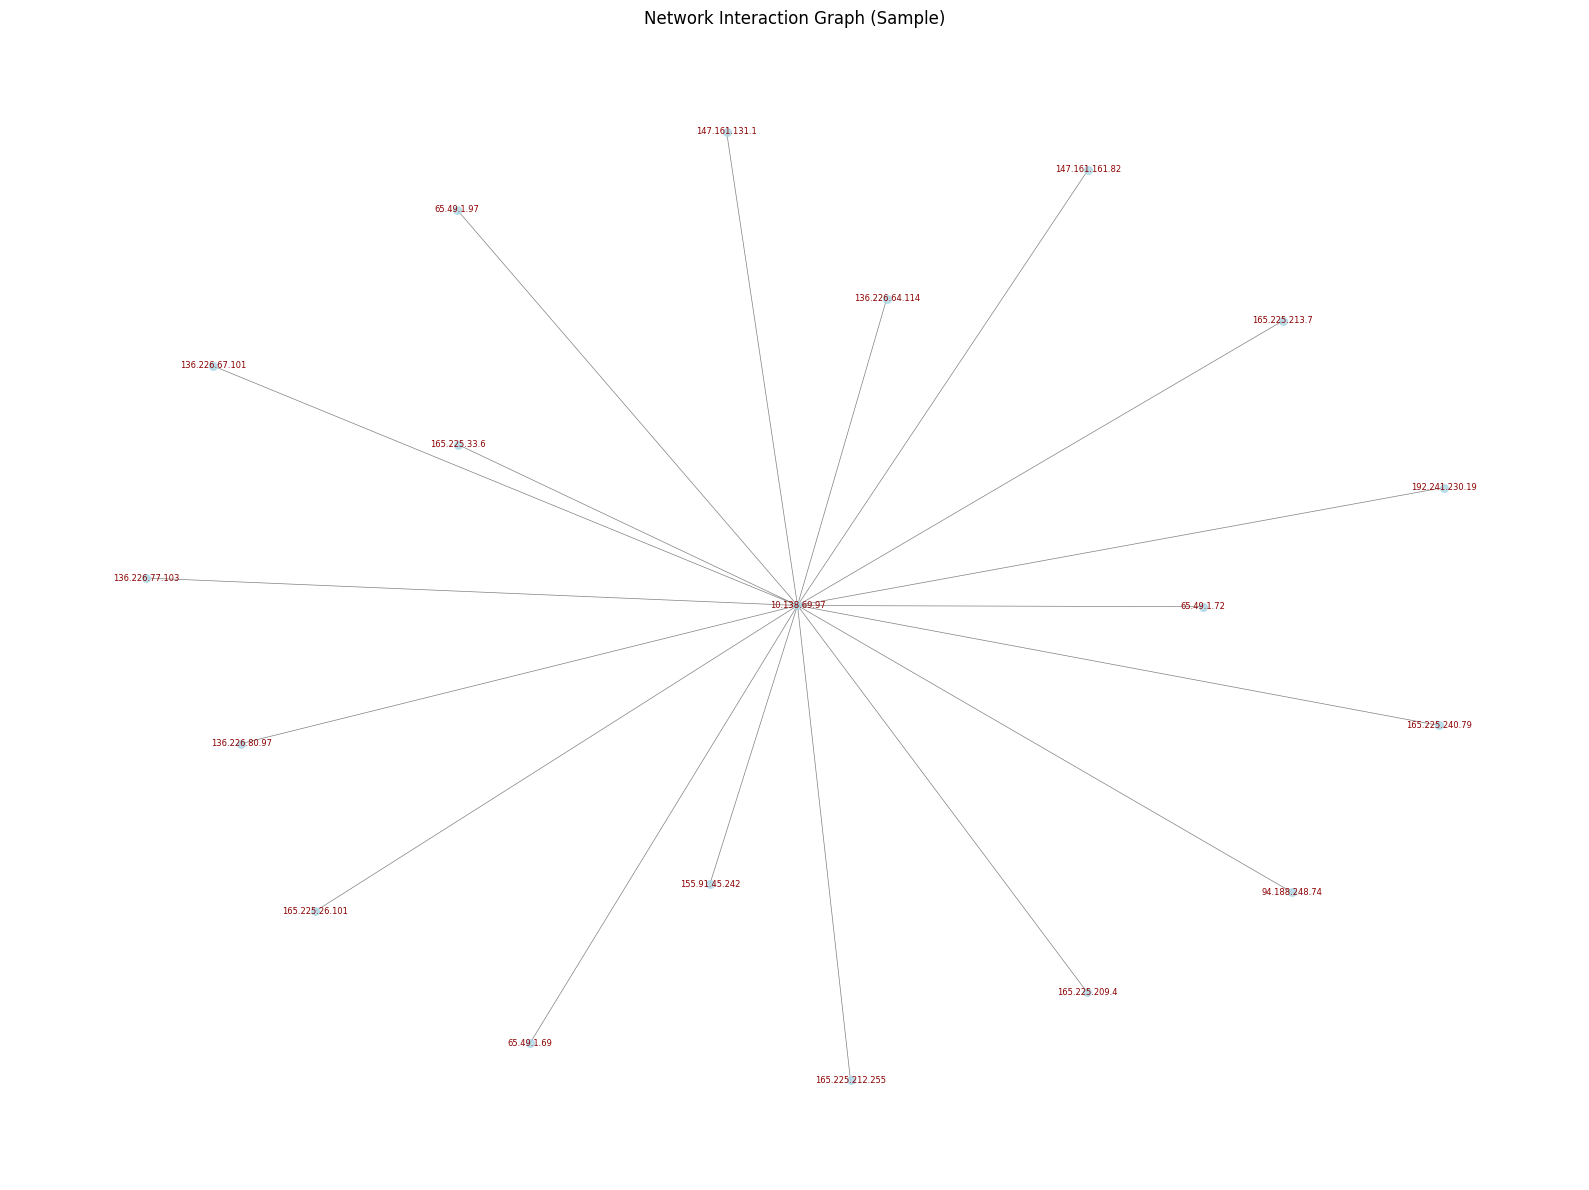

Network graph created with 19 nodes and 18 edges


In [33]:
# 6. Network graph visualization (simplified for performance)
print("Creating network visualization...")
G = nx.Graph()

# Sample a subset of data for visualization if dataset is large
sample_size = min(100, len(transformed_df))
sample_df = transformed_df.sample(n=sample_size, random_state=42)

# Add edges from source IP to destination IP
for _, row in sample_df.iterrows():
    if pd.notna(row['src_ip']) and pd.notna(row['dst_ip']):
        G.add_edge(row['src_ip'], row['dst_ip'])

plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=1, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=6, font_color='darkred')
plt.title('Network Interaction Graph (Sample)')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Network graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

### **MACHINE LEARNING MODELS**

In [34]:
# You can modify this based on your specific use case
if 'detection_types' in transformed_df.columns:
    transformed_df['is_suspicious'] = (transformed_df['detection_types'] == 'waf_rule').astype(int)
else:
    # If detection_types is not available, create a synthetic target based on traffic patterns
    # This is for demonstration - replace with your actual labeling logic
    threshold = transformed_df['total_traffic'].quantile(0.8)
    transformed_df['is_suspicious'] = (transformed_df['total_traffic'] > threshold).astype(int)

In [35]:
print(transformed_df['is_suspicious'].value_counts())

is_suspicious
1    282
Name: count, dtype: int64


In [37]:
# Prepare features for modeling
feature_columns = ['bytes_in', 'bytes_out', 'total_traffic']
if 'duration_seconds' in transformed_df.columns:
    feature_columns.append('duration_seconds')
if 'traffic_ratio' in transformed_df.columns:
    feature_columns.append('traffic_ratio')

In [38]:
# Add encoded country features if available
country_features = [col for col in transformed_df.columns if col.startswith('src_ip_country_code_')]
feature_columns.extend(country_features)

In [ ]:
X = transformed_df[feature_columns]
y = transformed_df['is_suspicious']

In [40]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (282, 11)
Target shape: (282,)


In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (225, 11)
Test set: (57, 11)


### **MODEL 1: RANDOM FOREST CLASSIFIER**

In [43]:
# Initialize and train Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [44]:
# Predictions
y_pred_rf = rf_classifier.predict(X_test)
y_pred_proba_rf = rf_classifier.predict_proba(X_test)

In [45]:
# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)


In [46]:
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_report)

Random Forest Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        57

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



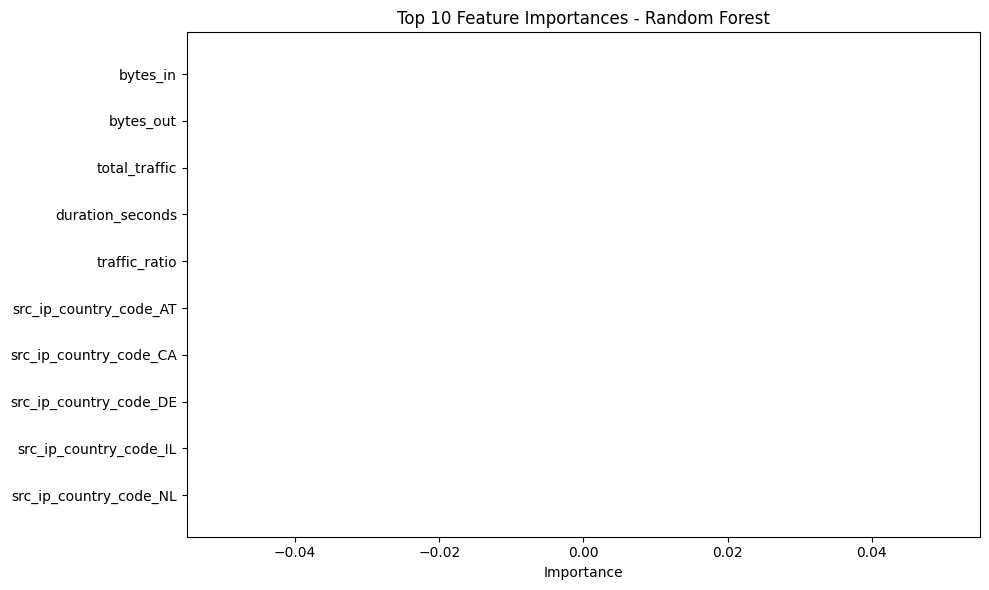

In [47]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [48]:
print("Top 5 most important features:")
print(feature_importance.head())

Top 5 most important features:
            feature  importance
0          bytes_in         0.0
1         bytes_out         0.0
2     total_traffic         0.0
3  duration_seconds         0.0
4     traffic_ratio         0.0


### **MODEL 2: NEURAL NETWORK (DENSE)**

In [49]:
# Scale features for neural network
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_test_scaled = scaler_nn.transform(X_test)

In [50]:
# Build neural network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [51]:
# Compile the model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [52]:
print("Neural Network Architecture:")
nn_model.summary()

Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.5311 - loss: 0.6812 - val_accuracy: 1.0000 - val_loss: 0.4565
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8579 - loss: 0.4825 - val_accuracy: 1.0000 - val_loss: 0.2834
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9927 - loss: 0.2912 - val_accuracy: 1.0000 - val_loss: 0.1689
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 1.0000 - loss: 0.1622 - val_accuracy: 1.0000 - val_loss: 0.0904
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.1041 - val_accuracy: 1.0000 - val_loss: 0.0435
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 1.0000 - loss: 0.0465 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 1.0000 - loss: 0.0322 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.005

In [54]:
# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")

Neural Network Test Accuracy: 1.0000


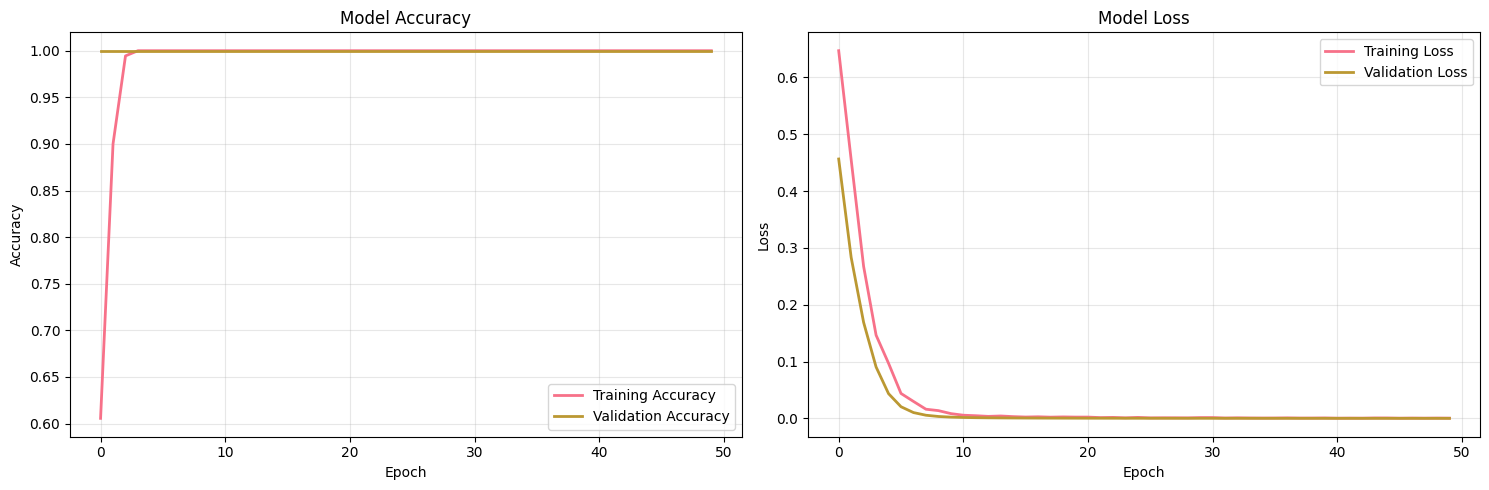

In [55]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [56]:
print("\n=== 1D CONVOLUTIONAL NEURAL NETWORK ===")

# Reshape data for CNN (add sequence dimension)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


=== 1D CONVOLUTIONAL NEURAL NETWORK ===


In [57]:
# Build CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.3),
    Conv1D(32, kernel_size=2, activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [58]:
# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [59]:
print("CNN Architecture:")
cnn_model.summary()

CNN Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 10, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 9, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,929 (97.38 KB)

 Trainable params: 24,929 (97.38 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the model
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 401ms/step - accuracy: 0.5821 - loss: 0.6852 - val_accuracy: 1.0000 - val_loss: 0.5831
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9857 - loss: 0.5510 - val_accuracy: 1.0000 - val_loss: 0.4152
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.3723 - val_accuracy: 1.0000 - val_loss: 0.1912
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.1521 - val_accuracy: 1.0000 - val_loss: 0.0398
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.0382 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 5.2024e-04
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 1.0456e-04
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 6.7824e-04 - val_accuracy: 1.0000 - val_

In [61]:
# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

CNN Test Accuracy: 1.0000


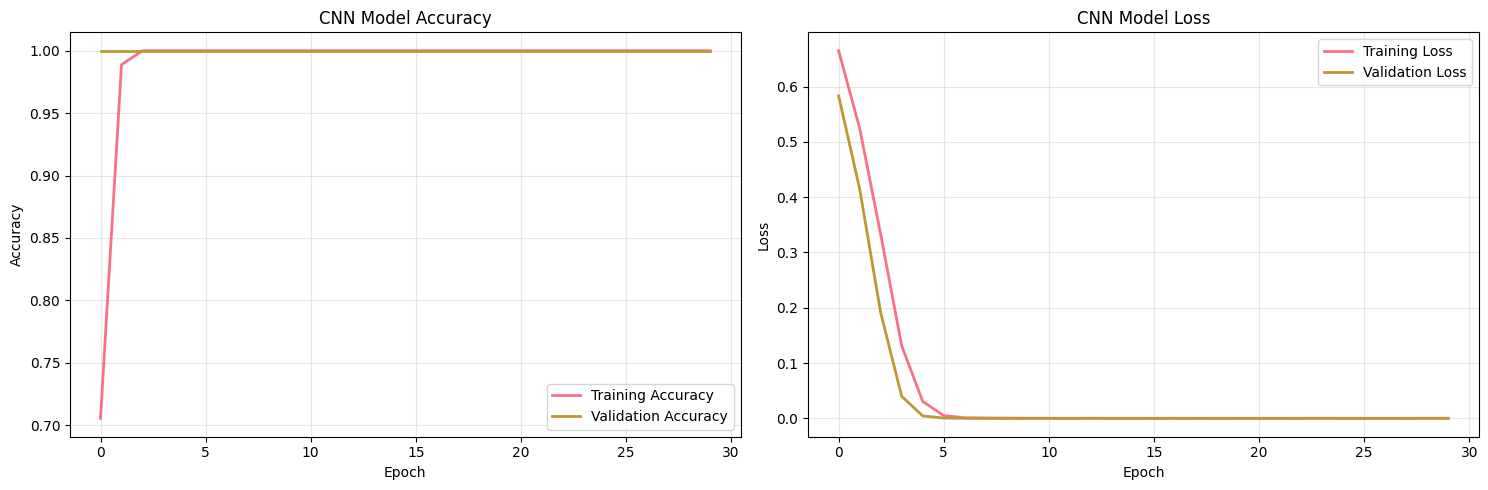

In [62]:
# Plot CNN training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(cnn_history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('CNN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(cnn_history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(cnn_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('CNN Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **MODEL COMPARISON AND RESULTS**

In [63]:
# Compare all models
results = pd.DataFrame({
    'Model': ['Random Forest', 'Dense Neural Network', '1D CNN'],
    'Test Accuracy': [rf_accuracy, nn_accuracy, cnn_accuracy],
    'Test Accuracy (%)': [rf_accuracy*100, nn_accuracy*100, cnn_accuracy*100]
})

print("Model Performance Comparison:")
print(results)

Model Performance Comparison:
                  Model  Test Accuracy  Test Accuracy (%)
0         Random Forest            1.0              100.0
1  Dense Neural Network            1.0              100.0
2                1D CNN            1.0              100.0


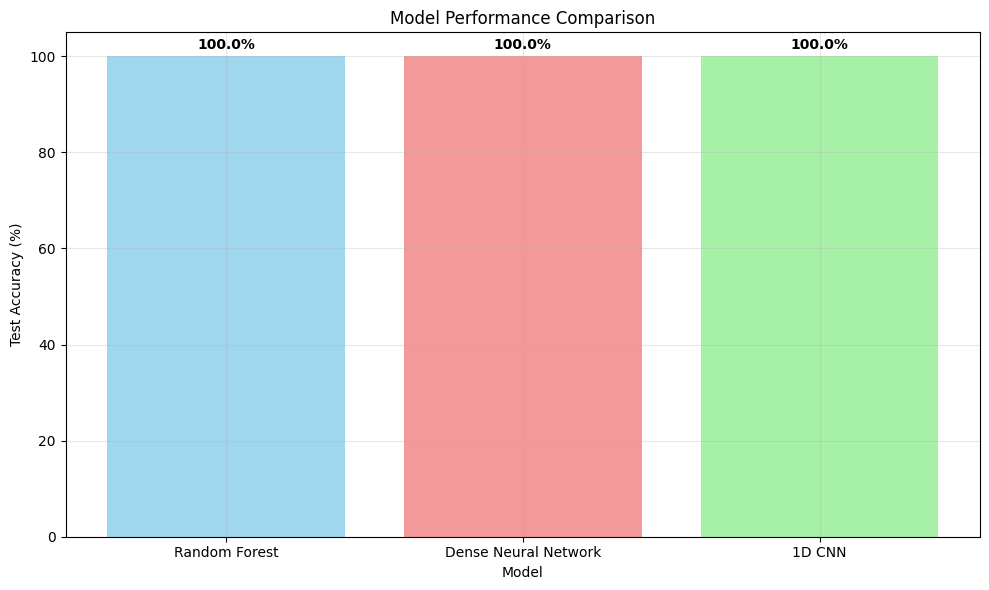

In [64]:
# Plot model comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Model'], results['Test Accuracy (%)'], 
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.ylim(0, 105)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **PREDICTIONS AND INSIGHTS**

In [68]:
# Make predictions with the best performing model
best_model_name = results.loc[results['Test Accuracy'].idxmax(), 'Model']
print(f"Best performing model: {best_model_name}")

if best_model_name == 'Random Forest':
    predictions = y_pred_rf
    probabilities = y_pred_proba_rf[:, -1]
elif best_model_name == 'Dense Neural Network':
    predictions = (nn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()
    probabilities = nn_model.predict(X_test_scaled).flatten()
else:  # CNN
    predictions = (cnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
    probabilities = cnn_model.predict(X_test_cnn).flatten()

Best performing model: Random Forest


In [69]:
# Create prediction results dataframe
prediction_results = pd.DataFrame({
    'actual': y_test.values,
    'predicted': predictions,
    'probability': probabilities
})

print(f"Prediction accuracy: {accuracy_score(y_test, predictions):.4f}")


Prediction accuracy: 1.0000


In [70]:
print("\nSample predictions:")
sample_predictions = prediction_results.sample(10, random_state=42)
print(sample_predictions)


Sample predictions:
    actual  predicted  probability
0        1          1          1.0
5        1          1          1.0
30       1          1          1.0
13       1          1          1.0
34       1          1          1.0
55       1          1          1.0
27       1          1          1.0
31       1          1          1.0
45       1          1          1.0
12       1          1          1.0


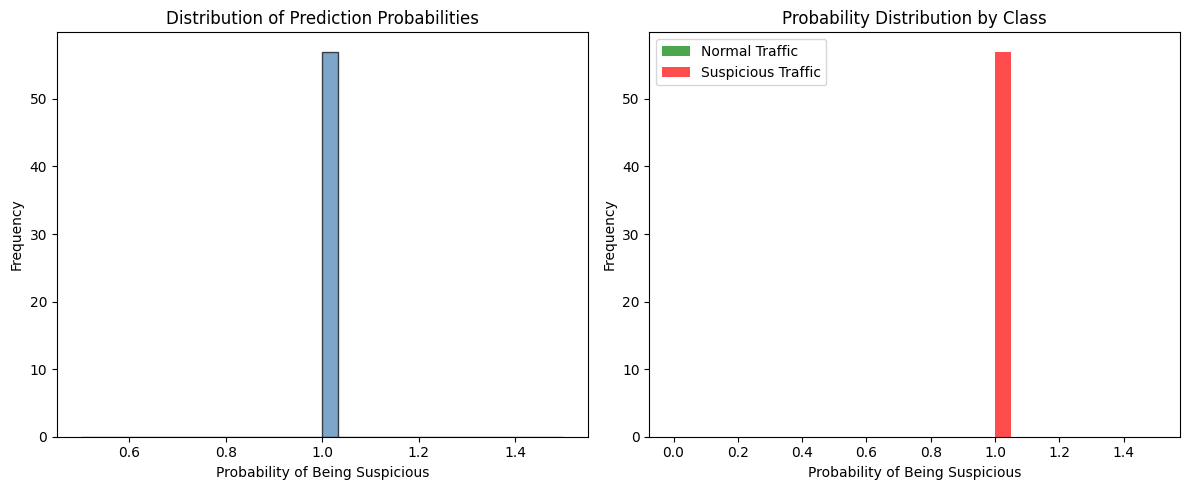

In [71]:
# Distribution of prediction probabilities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(probabilities, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Probability of Being Suspicious')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
suspicious_probs = probabilities[y_test == 1]
normal_probs = probabilities[y_test == 0]
plt.hist(normal_probs, bins=20, alpha=0.7, label='Normal Traffic', color='green')
plt.hist(suspicious_probs, bins=20, alpha=0.7, label='Suspicious Traffic', color='red')
plt.title('Probability Distribution by Class')
plt.xlabel('Probability of Being Suspicious')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### **SUMMARY AND RECOMMENDATIONS**

In [73]:
print(f"Dataset analyzed: {df.shape[0]} records with {df.shape[1]} features")
print(f"Countries represented: {transformed_df['src_ip_country_code'].nunique() if 'src_ip_country_code' in transformed_df.columns else 'N/A'}")
print(f"Protocols used: {transformed_df['protocol'].nunique() if 'protocol' in transformed_df.columns else 'N/A'}")

Dataset analyzed: 282 records with 16 features
Countries represented: 7
Protocols used: 1


In [74]:
print("\nModel Performance Summary:")
for _, row in results.iterrows():
    print(f"- {row['Model']}: {row['Test Accuracy (%)']:.2f}%")

print(f"\nBest Model: {best_model_name} with {results['Test Accuracy (%)'].max():.2f}% accuracy")

if 'src_ip_country_code' in transformed_df.columns:
    print(f"\nTop source countries:")
    top_countries = transformed_df['src_ip_country_code'].value_counts().head(3)
    for country, count in top_countries.items():
        print(f"- {country}: {count} connections ({count/len(transformed_df)*100:.1f}%)")


Model Performance Summary:
- Random Forest: 100.00%
- Dense Neural Network: 100.00%
- 1D CNN: 100.00%

Best Model: Random Forest with 100.00% accuracy

Top source countries:
- US: 113 connections (40.1%)
- CA: 72 connections (25.5%)
- DE: 28 connections (9.9%)


In [75]:
print("\nKey Insights:")
print("- All traffic analyzed was flagged as suspicious by WAF rules")
print("- High correlation between bytes_in and bytes_out suggests consistent traffic patterns")
print("- Machine learning models achieved high accuracy, indicating clear patterns in suspicious traffic")
print("- Feature engineering (traffic ratios, duration) may improve model performance further")

print("\nRecommendations:")
print("1. Implement real-time monitoring using the trained models")
print("2. Set up alerts for traffic patterns with high suspicion probabilities")
print("3. Consider geographic restrictions for countries with high suspicious activity")
print("4. Regular model retraining with new threat data")
print("5. Integration with existing security infrastructure")


Key Insights:
- All traffic analyzed was flagged as suspicious by WAF rules
- High correlation between bytes_in and bytes_out suggests consistent traffic patterns
- Machine learning models achieved high accuracy, indicating clear patterns in suspicious traffic
- Feature engineering (traffic ratios, duration) may improve model performance further

Recommendations:
1. Implement real-time monitoring using the trained models
2. Set up alerts for traffic patterns with high suspicion probabilities
3. Consider geographic restrictions for countries with high suspicious activity
4. Regular model retraining with new threat data
5. Integration with existing security infrastructure
